In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os.path

In [2]:
def fig_input(dataroot):
    
    # loading
    image = cv2.imread(dataroot)
    assert image is not None, "file could not be read, check the path"     
 
    # image's name and format
    name = (str(dataroot)).split('/')[-1]
    fig_name, file_format = name.split('.')

    return image, fig_name, file_format

In [3]:
def imshow(title = "Image", image = None, size = 10, cmap=None):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size*aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(title)
    plt.show()

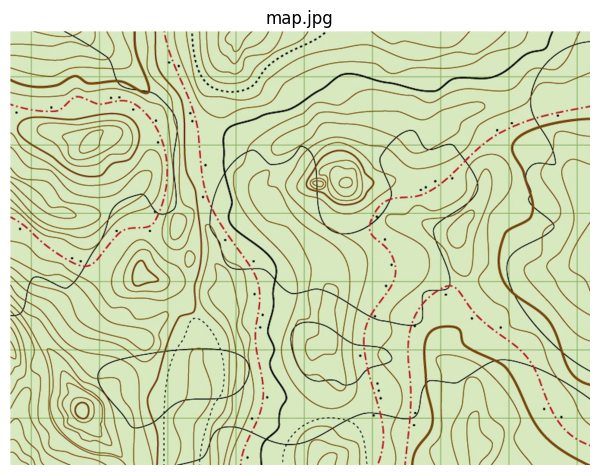

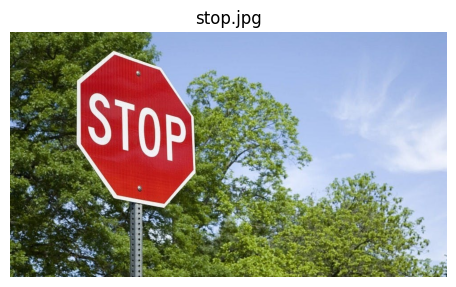

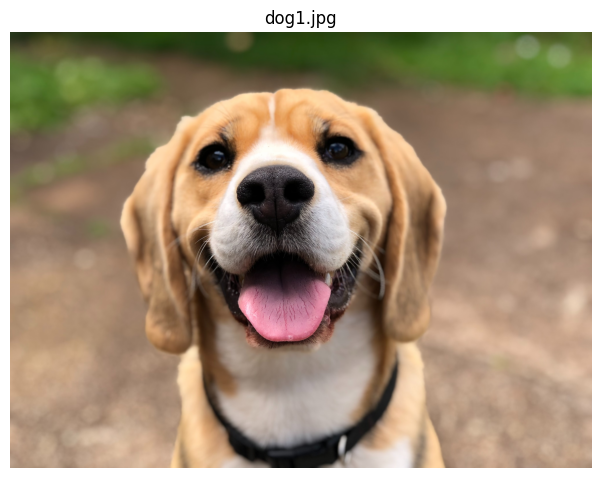

In [4]:
# images input

dataroot1 = 'C:/Users/MyWork/PycharmProjects/HW60_Edge_Filter/map.jpg'
dataroot2 = 'C:/Users/MyWork/PycharmProjects/HW60_Edge_Filter/stop.jpg'
dataroot3 = 'C:/Users/MyWork/PycharmProjects/HW60_Edge_Filter/dog1.jpg'

img1, fig_name1, file_format1 = fig_input(dataroot1)
imshow(title = fig_name1+'.'+file_format1, image = img1)

img2, fig_name2, file_format2 = fig_input(dataroot2)
imshow(title = fig_name2+'.'+file_format2, image = img2)

img3, fig_name3, file_format3 = fig_input(dataroot3)
imshow(title = fig_name3+'.'+file_format3, image = img3)

In [5]:
# Sobel filter

def sobel_filter(img):

    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
    kernel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    kernel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

    edges_x = cv2.filter2D(grey, -1, kernel_x)
    edges_y = cv2.filter2D(grey, -1, kernel_y)
    edges = edges_x + edges_y
    
    imshow(image=edges,  cmap='gray')

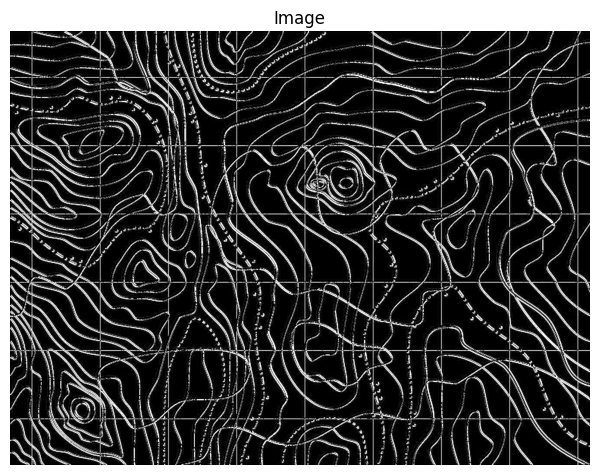

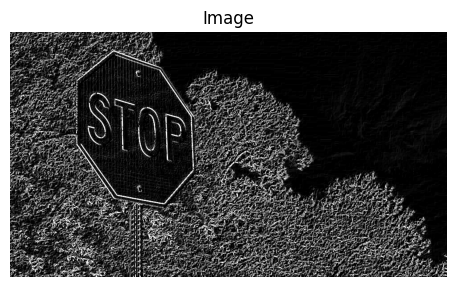

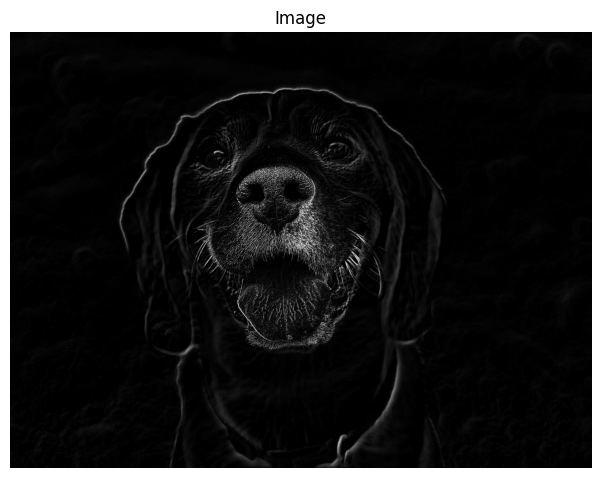

In [6]:
sobel_filter(img1)
sobel_filter(img2)
sobel_filter(img3)

In [7]:
# Canny filter

def canny_filter(img):
    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    canny = cv2.Canny(grey, 50, 150)
    imshow(image=canny, cmap='gray')

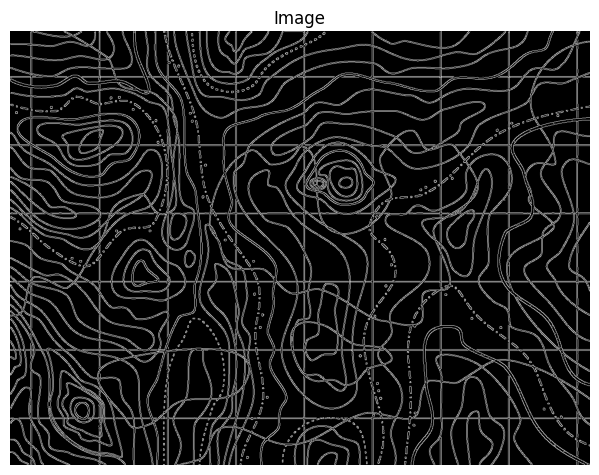

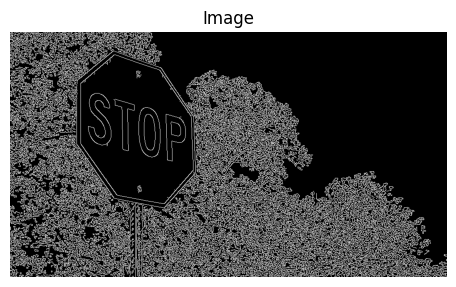

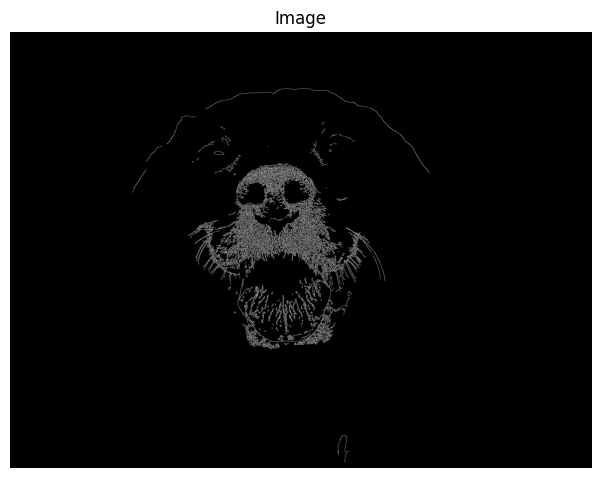

In [8]:
canny_filter(img1)
canny_filter(img2)
canny_filter(img3)

In [9]:
# Roberts filter

from scipy import ndimage
  
def roberts_filter(dataroot):
    roberts_cross_v = np.array( [[1, 0 ], [0,-1 ]] )
  
    roberts_cross_h = np.array( [[ 0, 1 ], [ -1, 0 ]] )
  
    img = cv2.imread(dataroot, 0).astype('float64')
    img /= 255.0
    vertical = ndimage.convolve(img, roberts_cross_v )
    horizontal = ndimage.convolve(img, roberts_cross_h )
  
    edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
    edged_img *= 255

    plt.imshow(edged_img, cmap='gray')
    plt.show()

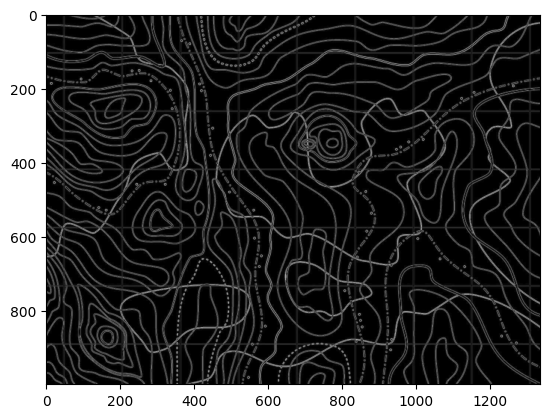

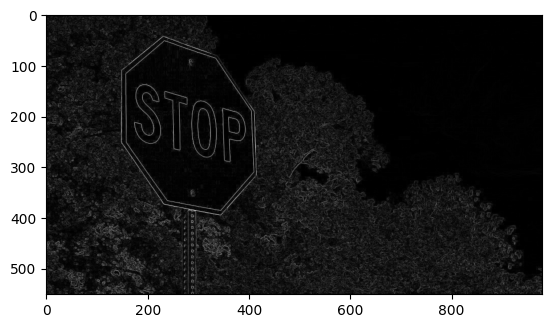

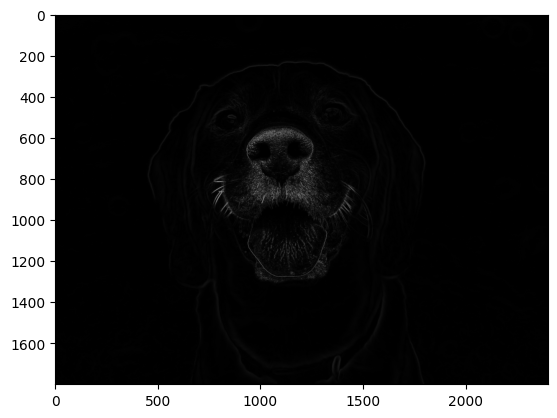

In [10]:
roberts_filter(dataroot1)
roberts_filter(dataroot2)
roberts_filter(dataroot3)

In [ ]:
# Різні фільтри краще підходять до різних типів зображення. 
# Собель дає більшу деталізацію (dog),
# Canny посилює контрастність (stop), 
# Roberts зберігає важливу інформацію (map, stop) 